# Multiple Linear Regression 

#### Build a multilinear regression model to understand the consumption of avocados in various cities of USA. Identify the attributes that can help the pricing of avocados.

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Recursive feature elimination
from sklearn.feature_selection import RFE


import statsmodels.formula.api as smf 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
avo_df = pd.read_csv(r"D:\360digi\DS\Sharath\Multiple_Linear_Regression\handson\Datasets_MLR\Avacado_Price.csv")
avo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   tot_ava1      18249 non-null  float64
 3   tot_ava2      18249 non-null  float64
 4   tot_ava3      18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [4]:
avo_df.describe()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
# check missing values
avo_df.isnull().sum()

AveragePrice    0
Total_Volume    0
tot_ava1        0
tot_ava2        0
tot_ava3        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
avo_df.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# Y = AveragePrice

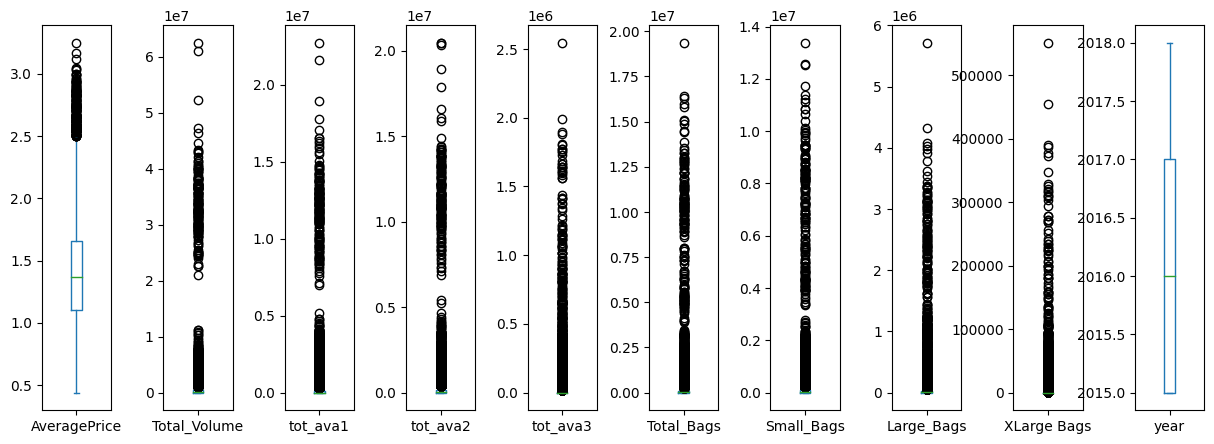

In [7]:
# box plot visualisation
avo_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (15,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
# outliers are present

In [8]:
# Seperating input and output variables 
X = pd.DataFrame(avo_df.iloc[:, 1:])
Y = pd.DataFrame(avo_df.iloc[:, 0])

## Data Preprocessing

In [9]:
# Select numeric features for data preprocessing
numeric_features = X.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge Bags', 'year'],
      dtype='object')


In [10]:
categorical_features = X.select_dtypes(include = ['object']).columns
print(categorical_features)

Index(['type', 'region'], dtype='object')


In [11]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = list(numeric_features))
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
                      'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags',
                      'year'])

In [12]:
# Missing values Analysis
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean'))])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer())])

In [13]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['Total_Volume', 'tot_ava1', 'tot_ava2',
                                       'tot_ava3', 'Total_Bags', 'Small_Bags',
                                       'Large_Bags', 'XLarge Bags', 'year']))])

In [14]:
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_features)])
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 Index(['Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge Bags', 'year'],
      dtype='object'))])


In [15]:
preprocessor1 = ColumnTransformer(transformers = [('wins', outlier_pipeline, numeric_features)])
print(preprocessor1)

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Total_Volume',
                                                                        'tot_ava1',
                                                                        'tot_ava2',
                                                                        'tot_ava3',
                                                                        'Total_Bags',
                                                                        'Small_Bags',
                                                                        'Large_Bags',
                                                                        '

In [16]:
# Fit the imputation pipeline to input features
imputation = preprocessor.fit(X)

In [17]:
# Transformed data
cleandata = pd.DataFrame(imputation.transform(X), columns = numeric_features)
cleandata.head()

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0


In [18]:
clean = preprocessor1.fit(cleandata)
clean

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Total_Volume',
                                                                        'tot_ava1',
                                                                        'tot_ava2',
                                                                        'tot_ava3',
                                                                        'Total_Bags',
                                                                        'Small_Bags',
                                                                        'Large_Bags',
                                                                        '

In [19]:
cleandata1 = pd.DataFrame(clean.transform(cleandata), columns = numeric_features)
cleandata1.head()

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0


In [20]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(cleandata1)

In [21]:
scaled_data = pd.DataFrame(scale.transform(cleandata1), columns = numeric_features)
scaled_data.describe()

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,0.270998,0.251657,0.266072,0.251236,0.289403,0.281647,0.261002,0.250361,0.382633
std,0.347254,0.359232,0.358850,0.384111,0.345405,0.341566,0.368503,0.416925,0.313313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010088,0.003091,0.008110,0.000000,0.018894,0.013963,0.002323,0.000000,0.000000
50%,0.100643,0.031293,0.078331,0.011852,0.147568,0.129185,0.048244,0.000000,0.333333
75%,0.406053,0.401855,0.404866,0.400000,0.411336,0.408378,0.401394,0.400000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
avo_df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [23]:
avo_df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [24]:
## Encoding
# Categorical features
encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])

preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, categorical_features)])

clean =  preprocess_pipeline.fit(X)

In [25]:
clean.transform(X).todense()

matrix([[1., 0., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 1.]])

In [26]:
encode_data = pd.DataFrame(clean.transform(X).todense())
encode_data

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18245,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18246,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
# To get feature names for Categorical columns after Onehotencoding 
encode_data.columns = clean.get_feature_names_out(input_features = X.columns)
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   categorical__type_conventional           18249 non-null  float64
 1   categorical__type_organic                18249 non-null  float64
 2   categorical__region_Albany               18249 non-null  float64
 3   categorical__region_Atlanta              18249 non-null  float64
 4   categorical__region_BaltimoreWashington  18249 non-null  float64
 5   categorical__region_Boise                18249 non-null  float64
 6   categorical__region_Boston               18249 non-null  float64
 7   categorical__region_BuffaloRochester     18249 non-null  float64
 8   categorical__region_California           18249 non-null  float64
 9   categorical__region_Charlotte            18249 non-null  float64
 10  categorical__region_Chicago              18249

In [28]:
 X.columns

Index(['Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [29]:
clean_data = pd.concat([scaled_data, encode_data], axis = 1)  # concatenated data will have new sequential index
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 65 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Total_Volume                             18249 non-null  float64
 1   tot_ava1                                 18249 non-null  float64
 2   tot_ava2                                 18249 non-null  float64
 3   tot_ava3                                 18249 non-null  float64
 4   Total_Bags                               18249 non-null  float64
 5   Small_Bags                               18249 non-null  float64
 6   Large_Bags                               18249 non-null  float64
 7   XLarge Bags                              18249 non-null  float64
 8   year                                     18249 non-null  float64
 9   categorical__type_conventional           18249 non-null  float64
 10  categorical__type_organic                18249

In [30]:
clean_data.describe()

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year,categorical__type_conventional,...,categorical__region_SouthCarolina,categorical__region_SouthCentral,categorical__region_Southeast,categorical__region_Spokane,categorical__region_StLouis,categorical__region_Syracuse,categorical__region_Tampa,categorical__region_TotalUS,categorical__region_West,categorical__region_WestTexNewMexico
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,...,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,0.270998,0.251657,0.266072,0.251236,0.289403,0.281647,0.261002,0.250361,0.382633,0.500082,...,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018357
std,0.347254,0.359232,0.358850,0.384111,0.345405,0.341566,0.368503,0.416925,0.313313,0.500014,...,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010088,0.003091,0.008110,0.000000,0.018894,0.013963,0.002323,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.100643,0.031293,0.078331,0.011852,0.147568,0.129185,0.048244,0.000000,0.333333,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.406053,0.401855,0.404866,0.400000,0.411336,0.408378,0.401394,0.400000,0.666667,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


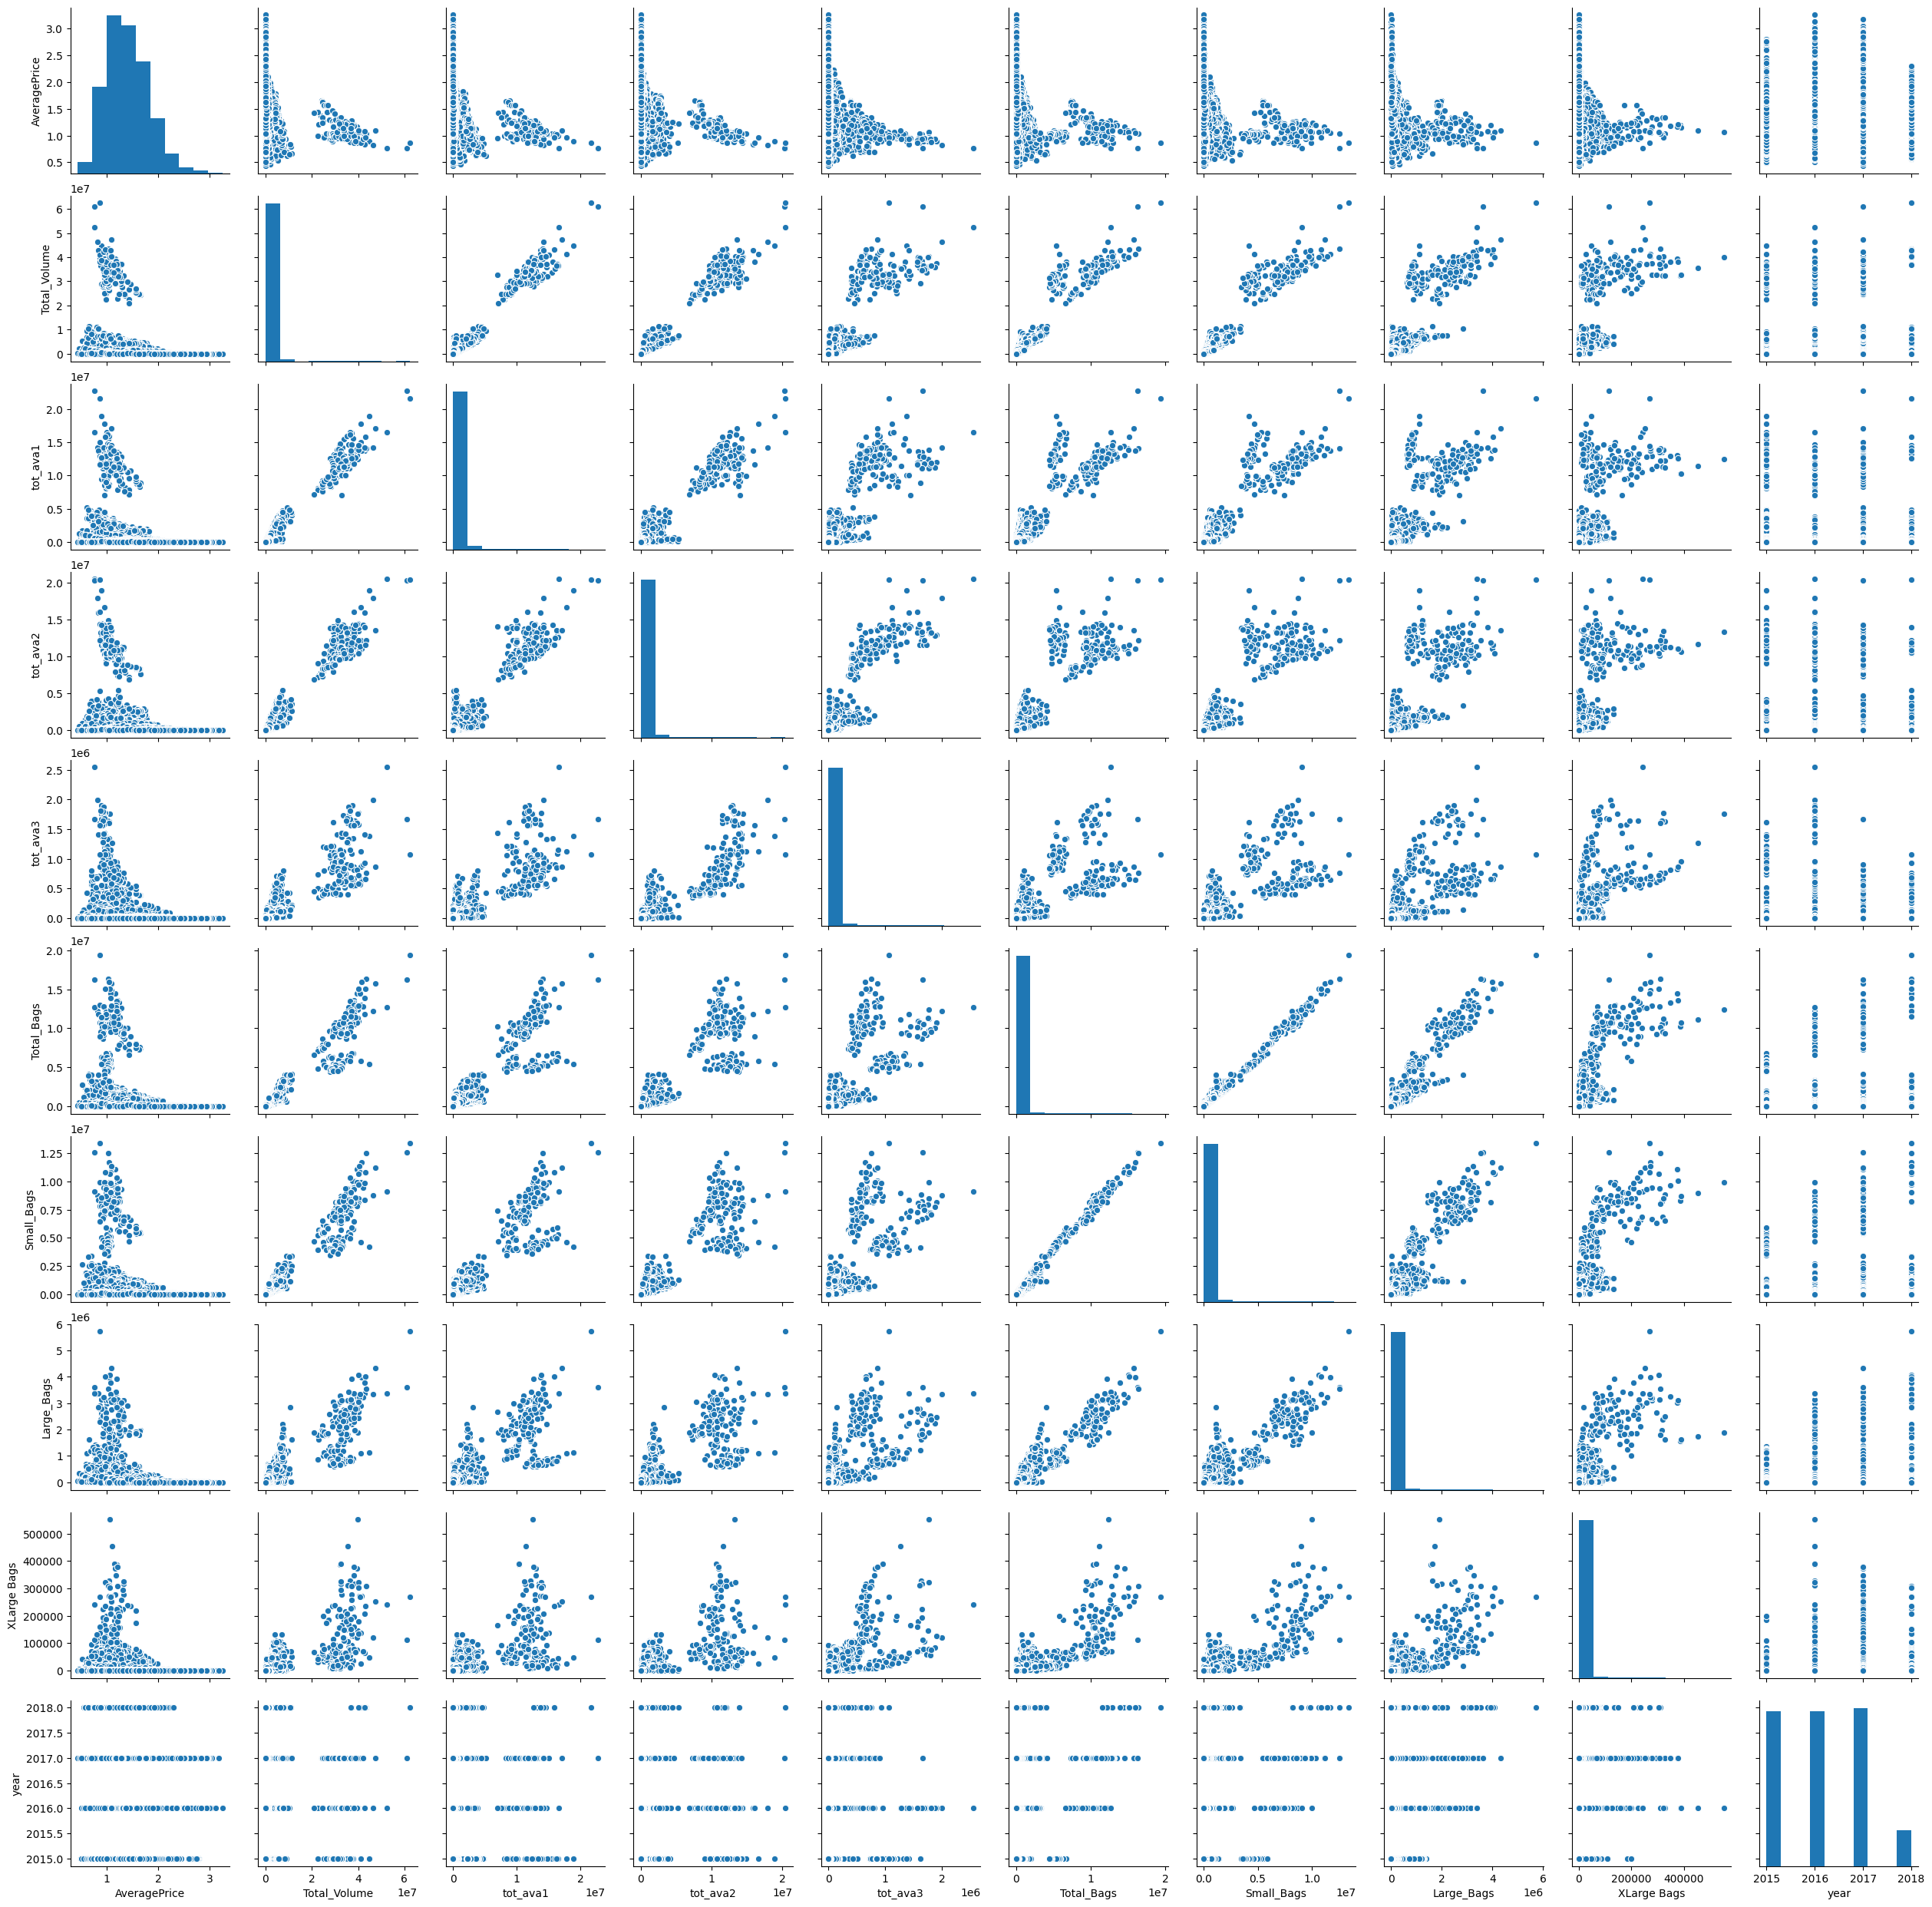

In [31]:
# Multivariate Analysis
sns.pairplot(avo_df) 

In [32]:
# Correlation Analysis on Original Data
orig_df_cor = avo_df.corr()
orig_df_cor

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total_Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
tot_ava1,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
tot_ava2,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
tot_ava3,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total_Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small_Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large_Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


In [ ]:
# All the input pairs show high Collinearity:
# Total_Volume - tot_ava1 : 0.98
# Total_Volume - tot_ava2 : 0.97
# Total_Volume - Small_Bags: 0.97
# so on....

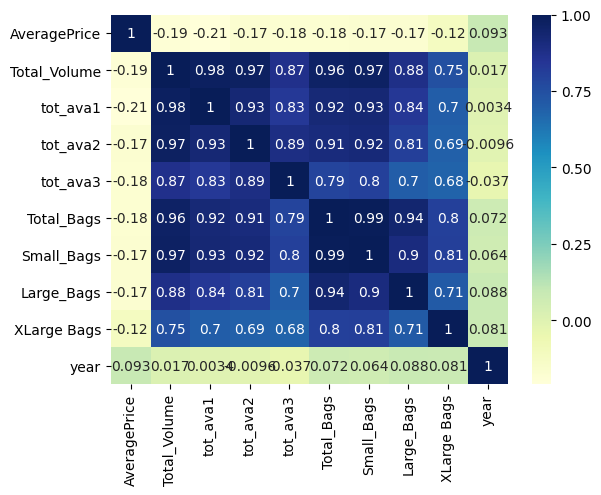

In [33]:
# Heatmap
dataplot = sns.heatmap(orig_df_cor, annot = True, cmap = "YlGnBu")

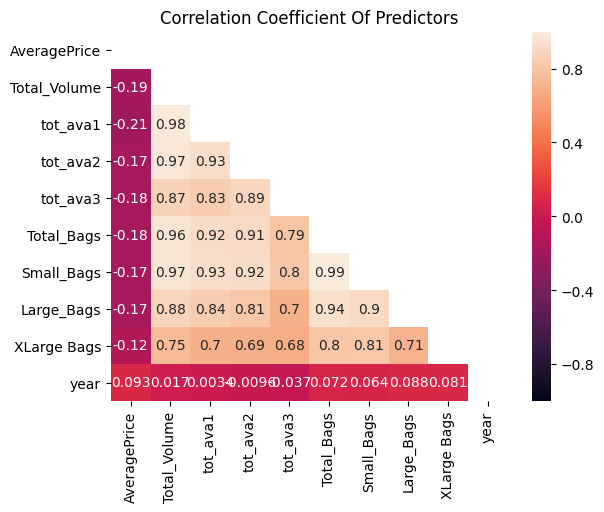

In [34]:
# Upper triangle of an array.
mask = np.triu(np.ones_like(orig_df_cor, dtype = bool))
sns.heatmap(orig_df_cor, annot = True, mask = mask, vmin = -1, vmax = 1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

# Multiple Linear Regression

In [ ]:
# Build a vanilla model on full dataset
# The intercept is not fit in this 'statsmodel' model so we add a constant value/column

In [35]:
C = add_constant(clean_data)
C.head()

,const,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year,...,categorical__region_SouthCarolina,categorical__region_SouthCentral,categorical__region_Southeast,categorical__region_Spokane,categorical__region_StLouis,categorical__region_Syracuse,categorical__region_Tampa,categorical__region_TotalUS,categorical__region_West,categorical__region_WestTexNewMexico
0,1.0,0.060177,0.003753,0.146777,0.003085,0.032291,0.042160,0.001699,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.051397,0.002441,0.120319,0.003737,0.035294,0.046102,0.001776,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.110815,0.002877,0.294201,0.008361,0.030244,0.039409,0.001879,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.074018,0.004097,0.194004,0.004650,0.021577,0.027821,0.002437,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.047797,0.003408,0.118162,0.004855,0.022961,0.029334,0.003602,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
basemodel = sm.OLS(Y, C).fit()
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     395.2
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:51:38   Log-Likelihood:                -1423.4
No. Observations:               18249   AIC:                             2975.
Df Residuals:                   18185   BIC:                             3475.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                   -3.578e+10   4.72e+11     -0.076      0.940   -9.62e+11     8.9e+11
Total_Volume                               -0.3212      0.042     -7.660      0.000      -0.403      -0.239
tot_ava1                                    0.0617      0.017      3.536      0.000       0.027       0.096
tot_ava2                                    0.0791      0.023      3.427      0.001       0.034       0.124
tot_ava3                                   -0.0654      0.010     -6.876      0.000      -0.084      -0.047
Total_Bags                                 -0.1080      0.038     -2.808      0.005      -0.183      -0.033
Small_Bags                                  0.0512      0.032      1.579      0.114      -0.012       0.115
Large_Bags                                 -0.0698      0.013     -5.293      0.000      -0.096      -0.044
XLarge Bags                                 0.0905      0.007     13.388      0.000       0.077       0.104
year                                        0.1288      0.007     18.609      0.000       0.115       0.142
categorical__type_conventional           3.671e+10   4.85e+11      0.076      0.940   -9.13e+11    9.87e+11
categorical__type_organic                3.671e+10   4.85e+11      0.076      0.940   -9.13e+11    9.87e+11
categorical__region_Albany              -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_Atlanta             -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_BaltimoreWashington -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_Boise               -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_Boston              -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_BuffaloRochester    -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_California          -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_Charlotte           -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_Chicago             -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_CincinnatiDayton    -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_Columbus            -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_DallasFtWorth       -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_Denver              -9.236e+08   1.22e+10     -0.076      0.940   -2.48e+10     2.3e+10
categorical__region_Detroit             -9.236e+08   1.22e+

In [ ]:
# R-squared:0.578 
# All the categorical input columns have high p-value : 0.940 > 0.05

In [37]:
# Identify the variable with highest collinearity using 'Variance Inflation Factor(VIF)'
# VIF = 1/(1-R*R)
# Assume VIF > 10 = collinearity

vif = pd.Series([variance_inflation_factor(C.values, i) for i in range(C.shape[1])], index = C.columns)
vif

const                                   0.000000e+00
Total_Volume                            5.628206e+01
tot_ava1                                1.043725e+01
tot_ava2                                1.821684e+01
tot_ava3                                3.532383e+00
                                            ...     
categorical__region_Syracuse            3.123045e+08
categorical__region_Tampa               3.123045e+08
categorical__region_TotalUS             6.396291e+09
categorical__region_West                6.941241e+07
categorical__region_WestTexNewMexico    7.926144e+09
Length: 66, dtype: float64

In [38]:
vif = np.asarray([variance_inflation_factor(C.values, i) for i in range(C.shape[1])])
vif

array([0.00000000e+00, 5.62820606e+01, 1.04372533e+01, 1.82168437e+01,
       3.53238341e+00, 4.68272656e+01, 3.25798993e+01, 6.27303511e+00,
       2.10957974e+00, 1.24913433e+00,            inf,            inf,
       2.16899520e+05, 6.24506333e+08, 1.24921803e+09, 2.49884708e+09,
       1.92199540e+08, 6.24711684e+08, 1.16729965e+09, 4.99637927e+08,
       1.24921803e+09, 2.49802516e+09, 2.77649641e+08, 1.99855182e+09,
       2.49884708e+09, 9.99210063e+09, 3.12304506e+08, 6.15050959e+08,
       1.24909480e+08, 2.49884708e+09, 2.49802516e+09, 6.24506333e+08,
       1.24921803e+09, 1.24921803e+09, 1.22984188e+08, 3.12304506e+08,
       9.99538278e+09, 1.92175235e+08, 1.24921803e+09, 1.24921803e+09,
       4.99637927e+08, 7.68700923e+08, 6.24711684e+08, 4.99736503e+08,
       3.12304506e+08, 6.89145608e+08, 3.12304506e+08, 2.55851454e+10,
       9.99210063e+09, 1.24921803e+09, 6.24711684e+08, 3.12304506e+08,
                  inf,            inf, 3.07519264e+09,            inf,
      

In [39]:
print(C.columns[vif>10])

Index(['Total_Volume', 'tot_ava1', 'tot_ava2', 'Total_Bags', 'Small_Bags',
       'categorical__type_conventional', 'categorical__type_organic',
       'categorical__region_Albany', 'categorical__region_Atlanta',
       'categorical__region_BaltimoreWashington', 'categorical__region_Boise',
       'categorical__region_Boston', 'categorical__region_BuffaloRochester',
       'categorical__region_California', 'categorical__region_Charlotte',
       'categorical__region_Chicago', 'categorical__region_CincinnatiDayton',
       'categorical__region_Columbus', 'categorical__region_DallasFtWorth',
       'categorical__region_Denver', 'categorical__region_Detroit',
       'categorical__region_GrandRapids', 'categorical__region_GreatLakes',
       'categorical__region_HarrisburgScranton',
       'categorical__region_HartfordSpringfield',
       'categorical__region_Houston', 'categorical__region_Indianapolis',
       'categorical__region_Jacksonville', 'categorical__region_LasVegas',
       'cat

In [40]:
C.columns[vif<=10]

Index(['const', 'tot_ava3', 'Large_Bags', 'XLarge Bags', 'year'], dtype='object')

In [41]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 65 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Total_Volume                             18249 non-null  float64
 1   tot_ava1                                 18249 non-null  float64
 2   tot_ava2                                 18249 non-null  float64
 3   tot_ava3                                 18249 non-null  float64
 4   Total_Bags                               18249 non-null  float64
 5   Small_Bags                               18249 non-null  float64
 6   Large_Bags                               18249 non-null  float64
 7   XLarge Bags                              18249 non-null  float64
 8   year                                     18249 non-null  float64
 9   categorical__type_conventional           18249 non-null  float64
 10  categorical__type_organic                18249

In [42]:
# column with high VIF values are removed

In [43]:
clean_data1 = clean_data.iloc[:,[ 3, 6, 7, 8]]

In [44]:
clean_data1.columns

Index(['tot_ava3', 'Large_Bags', 'XLarge Bags', 'year'], dtype='object')

In [45]:
# Build a model on dataset
basemodel2 = sm.OLS(Y, clean_data1).fit()
basemodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AveragePrice   R-squared (uncentered):                   0.600
Model:                            OLS   Adj. R-squared (uncentered):              0.600
Method:                 Least Squares   F-statistic:                              6851.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:52:08   Log-Likelihood:                         -24464.
No. Observations:               18249   AIC:                                  4.894e+04
Df Residuals:                   18245   BIC:                                  4.897e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
tot_ava3        0.6057      0.022     27.737      0.000       0.563       0.648
Large_Bags      0.0471      0.021      2.207      0.027       0.005       0.089
XLarge Bags    -0.2292      0.021    -10.956      0.000      -0.270      -0.188
year            2.1219      0.017    126.255      0.000       2.089       2.155
==============================================================================
Omnibus:                      158.334   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.729
Skew:                          -0.064   Prob(JB):                     1.49e-24
Kurtosis:                       2.642   Cond. No.                         3.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R-squared (uncentered): 0.600

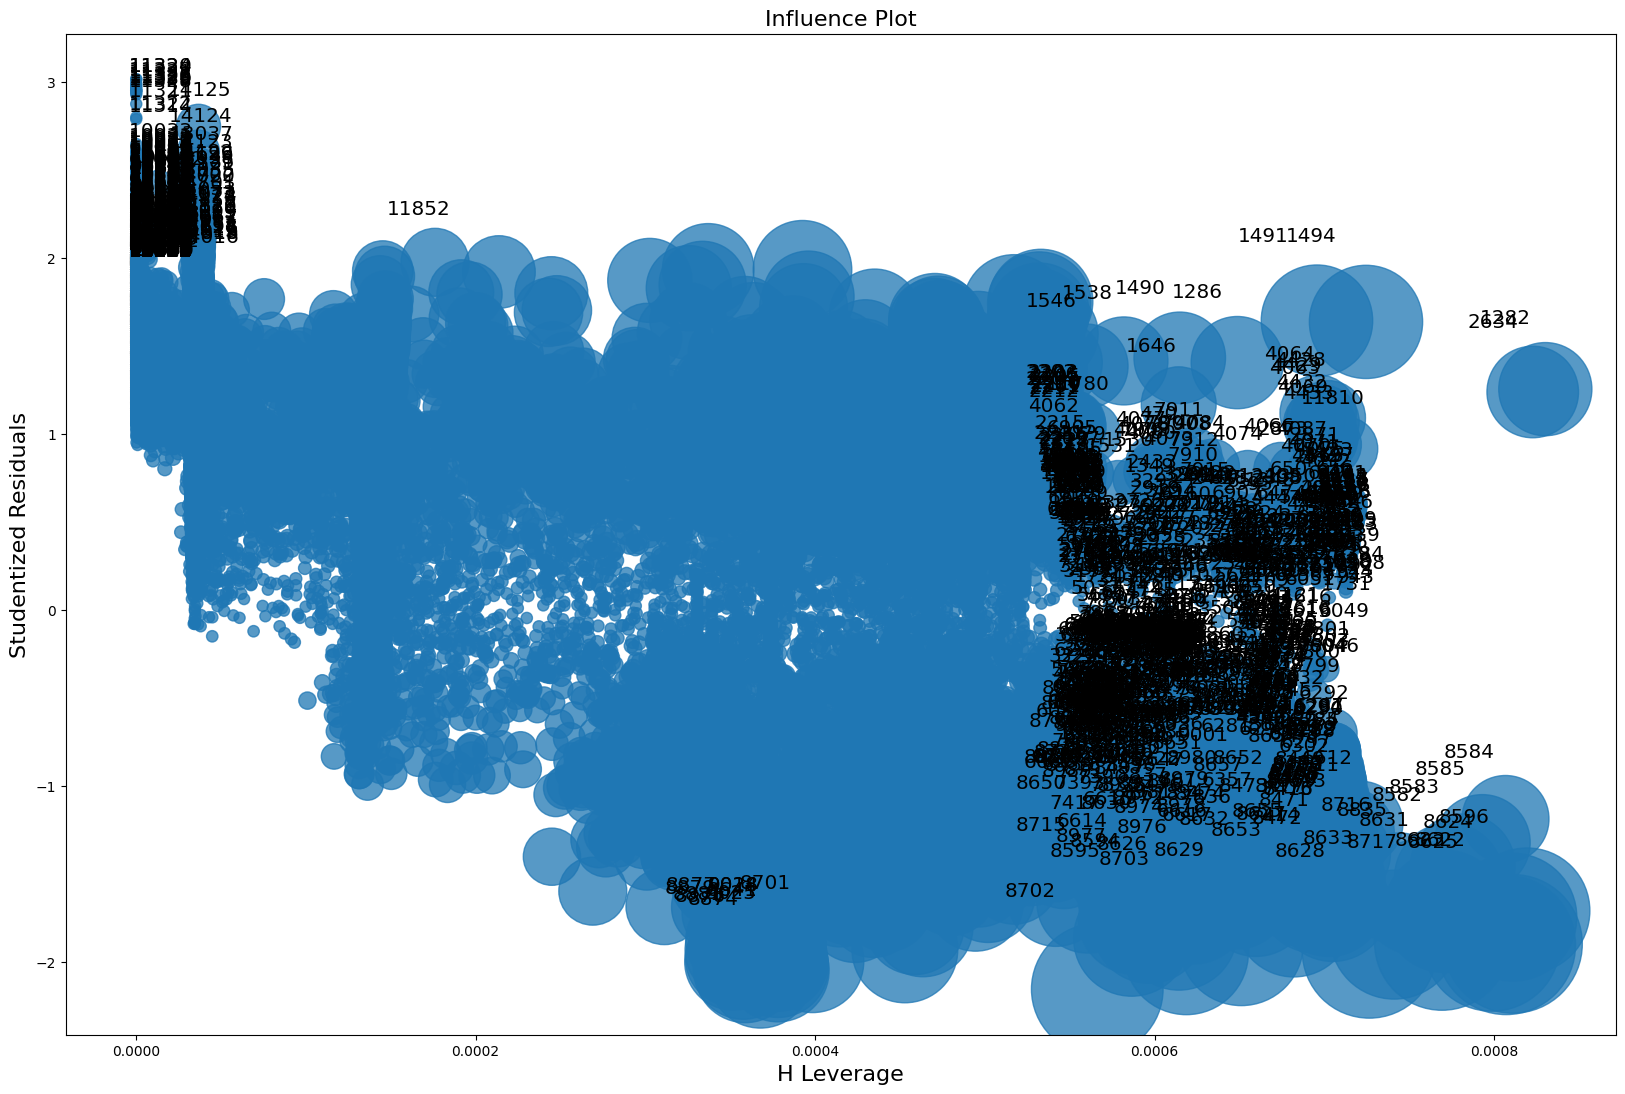

In [46]:
plt.rcParams["figure.figsize"] = (20,13)
sm.graphics.influence_plot(basemodel2, size=100, plot_alpha=0.75)
plt.show()

In [47]:
clean_data1_new = clean_data1.drop(clean_data1.index[[11852, 1286, 1490, 1546, 1538, 1646, 8702]])
Y_new = Y.drop(Y.index[[11852, 1286, 1490, 1546, 1538, 1646, 8702]])

In [48]:
# Build model on new dataset
basemodel3 = sm.OLS(Y_new, clean_data1_new).fit()
basemodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AveragePrice   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.601
Method:                 Least Squares   F-statistic:                              6856.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:55:13   Log-Likelihood:                         -24449.
No. Observations:               18242   AIC:                                  4.891e+04
Df Residuals:                   18238   BIC:                                  4.894e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
tot_ava3        0.6084      0.022     27.856      0.000       0.566       0.651
Large_Bags      0.0446      0.021      2.088      0.037       0.003       0.086
XLarge Bags    -0.2317      0.021    -11.075      0.000      -0.273      -0.191
year            2.1239      0.017    126.352      0.000       2.091       2.157
==============================================================================
Omnibus:                      159.918   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.272
Skew:                          -0.062   Prob(JB):                     1.13e-24
Kurtosis:                       2.640   Cond. No.                         3.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R-squared (uncentered): 0.601

In [49]:
clean_data1_new.describe()

,tot_ava3,Large_Bags,XLarge Bags,year
count,18242.000000,18242.000000,18242.000000,18242.000000
mean,0.251219,0.260756,0.250184,0.382725
std,0.384129,0.368346,0.416841,0.313263
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.002318,0.000000,0.000000
50%,0.011851,0.048192,0.000000,0.333333
75%,0.400038,0.399350,0.395751,0.666667
max,1.000000,1.000000,1.000000,1.000000


In [50]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(clean_data1_new, Y_new, test_size = 0.2, random_state = 0) 

In [51]:
## Build the best model Model building with out cv
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AveragePrice   R-squared (uncentered):                   0.597
Model:                            OLS   Adj. R-squared (uncentered):              0.597
Method:                 Least Squares   F-statistic:                              5411.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:55:24   Log-Likelihood:                         -19606.
No. Observations:               14593   AIC:                                  3.922e+04
Df Residuals:                   14589   BIC:                                  3.925e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
tot_ava3        0.5965      0.025     24.228      0.000       0.548       0.645
Large_Bags      0.0551      0.024      2.314      0.021       0.008       0.102
XLarge Bags    -0.2264      0.023     -9.655      0.000      -0.272      -0.180
year            2.1128      0.019    112.015      0.000       2.076       2.150
==============================================================================
Omnibus:                      126.145   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.531
Skew:                          -0.064   Prob(JB):                     9.84e-20
Kurtosis:                       2.643   Cond. No.                         3.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# R-squared (uncentered): 0.597

In [53]:
# Predicting upon X_train
ytrain_pred = model.predict(X_train)
r_squared_train = r2_score(Y_train, ytrain_pred)
r_squared_train

-4.3031247686262075

In [54]:
# Train residual values
train_resid  = Y_train.AveragePrice - ytrain_pred
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

0.9273407167256222

In [55]:
# Predicting upon X_test
y_pred = model.predict(X_test)

In [56]:
# checking the Accurarcy by using r2_score
r_squared = r2_score(Y_test, y_pred)
r_squared

-4.13490736533757

In [57]:
# Test residual values
test_resid  = Y_test.AveragePrice - y_pred
# RMSE value for train data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

0.91225129782767

In [58]:
## Scores with Cross Validation (cv)
# k-fold CV (using all variables)
lm = LinearRegression()

In [59]:
## Scores with KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

scores = cross_val_score(lm, X_train, Y_train, scoring = 'r2', cv = folds)
scores

array([0.29215087, 0.29168528, 0.28978268, 0.29097307, 0.2980267 ])

In [60]:
## Model building with CV and RFE

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [61]:
# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]

In [62]:
# step-3: perform grid search
# 3.1 specify model
# lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [63]:
# Recursive feature elimination
rfe = RFE(lm)

In [64]:
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring = 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score = True) 

In [65]:
# fit the model
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009417,0.002784,0.003190,0.000748,1,{'n_features_to_select': 1},0.212457,0.215358,0.202486,0.220349,...,0.213410,0.006019,5,0.213481,0.212778,0.216125,0.211568,0.212492,0.213289,0.001545
1,0.007686,0.002134,0.002394,0.000799,2,{'n_features_to_select': 2},0.275643,0.273322,0.271496,0.274987,...,0.275876,0.004277,4,0.276082,0.276629,0.277163,0.276225,0.274013,0.276023,0.001072
2,0.004588,0.000799,0.002992,0.000631,3,{'n_features_to_select': 3},0.284759,0.283440,0.284534,0.285110,...,0.286543,0.004201,3,0.287221,0.287494,0.287260,0.287095,0.284680,0.286750,0.001043
3,0.004102,0.000807,0.003384,0.001013,4,{'n_features_to_select': 4},0.292151,0.291685,0.289783,0.290973,...,0.292524,0.002865,1,0.292894,0.292984,0.293494,0.293168,0.291412,0.292790,0.000719
4,0.004999,0.001100,0.003377,0.000485,5,{'n_features_to_select': 5},0.292151,0.291685,0.289783,0.290973,...,0.292524,0.002865,1,0.292894,0.292984,0.293494,0.293168,0.291412,0.292790,0.000719


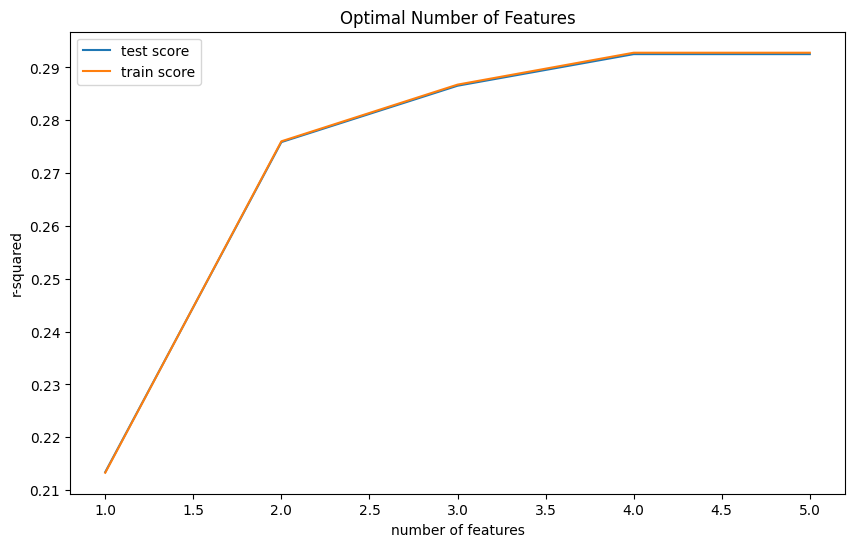

In [67]:
# plotting cv results
plt.figure(figsize = (10, 6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc = 'upper left')

# train and test scores get stable after 4 feature. 
# we can select number of optimal features more than 4

In [68]:
model_cv.best_params_

{'n_features_to_select': 4}

In [69]:
cv_lm_grid = model_cv.best_estimator_
cv_lm_grid

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [70]:
# Model gives best result when we consider 4 features.

In [71]:
rfe_3 = RFE(lm,n_features_to_select=4)

In [72]:
rfe_3 = rfe_3.fit(X_train,Y_train)

In [73]:
rfe_3.support_

array([ True,  True,  True,  True])

In [74]:
rfe_3.feature_names_in_[rfe_3.support_]

array(['tot_ava3', 'Large_Bags', 'XLarge Bags', 'year'], dtype=object)

In [75]:
# Consider the columns after recursive feature elimination and test the model
# Select the best features and build the model

In [76]:
X_new = clean_data.loc[:,['tot_ava3', 'Large_Bags', 'XLarge Bags', 'year']]
X_new.shape

(18249, 4)

In [77]:
Y1 = pd.DataFrame(avo_df.iloc[:, 0])
Y1.shape

(18249, 1)

In [78]:
# Build model on new dataset
basemodel4 = sm.OLS(Y1, X_new).fit()
basemodel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AveragePrice   R-squared (uncentered):                   0.600
Model:                            OLS   Adj. R-squared (uncentered):              0.600
Method:                 Least Squares   F-statistic:                              6851.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:55:58   Log-Likelihood:                         -24464.
No. Observations:               18249   AIC:                                  4.894e+04
Df Residuals:                   18245   BIC:                                  4.897e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
tot_ava3        0.6057      0.022     27.737      0.000       0.563       0.648
Large_Bags      0.0471      0.021      2.207      0.027       0.005       0.089
XLarge Bags    -0.2292      0.021    -10.956      0.000      -0.270      -0.188
year            2.1219      0.017    126.255      0.000       2.089       2.155
==============================================================================
Omnibus:                      158.334   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.729
Skew:                          -0.064   Prob(JB):                     1.49e-24
Kurtosis:                       2.642   Cond. No.                         3.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R-squared (uncentered): 0.600 , where |r| < 0.85 is considered as moderate correlation

In [79]:
# Prediction
pred = basemodel4.predict(X_new)

In [80]:
test_resid = pred - Y1.AveragePrice

In [81]:
# RMSE value
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

0.9246002332202694

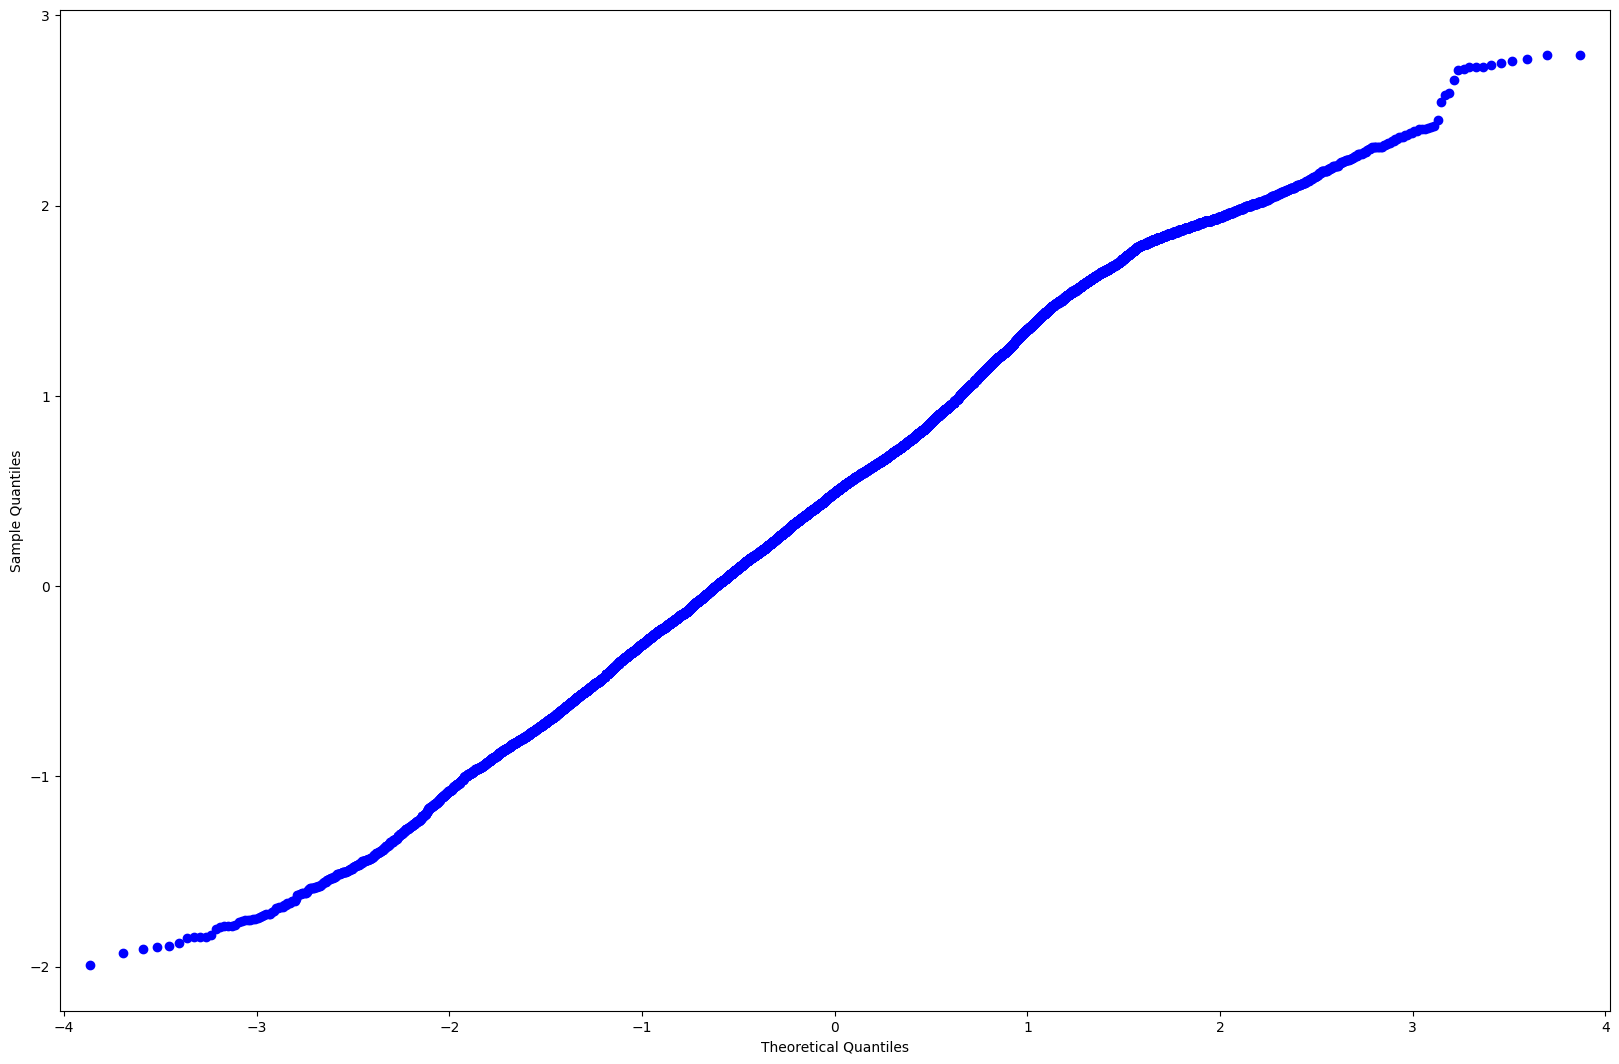

In [82]:
res = basemodel4.resid
sm.qqplot(res)
plt.show()

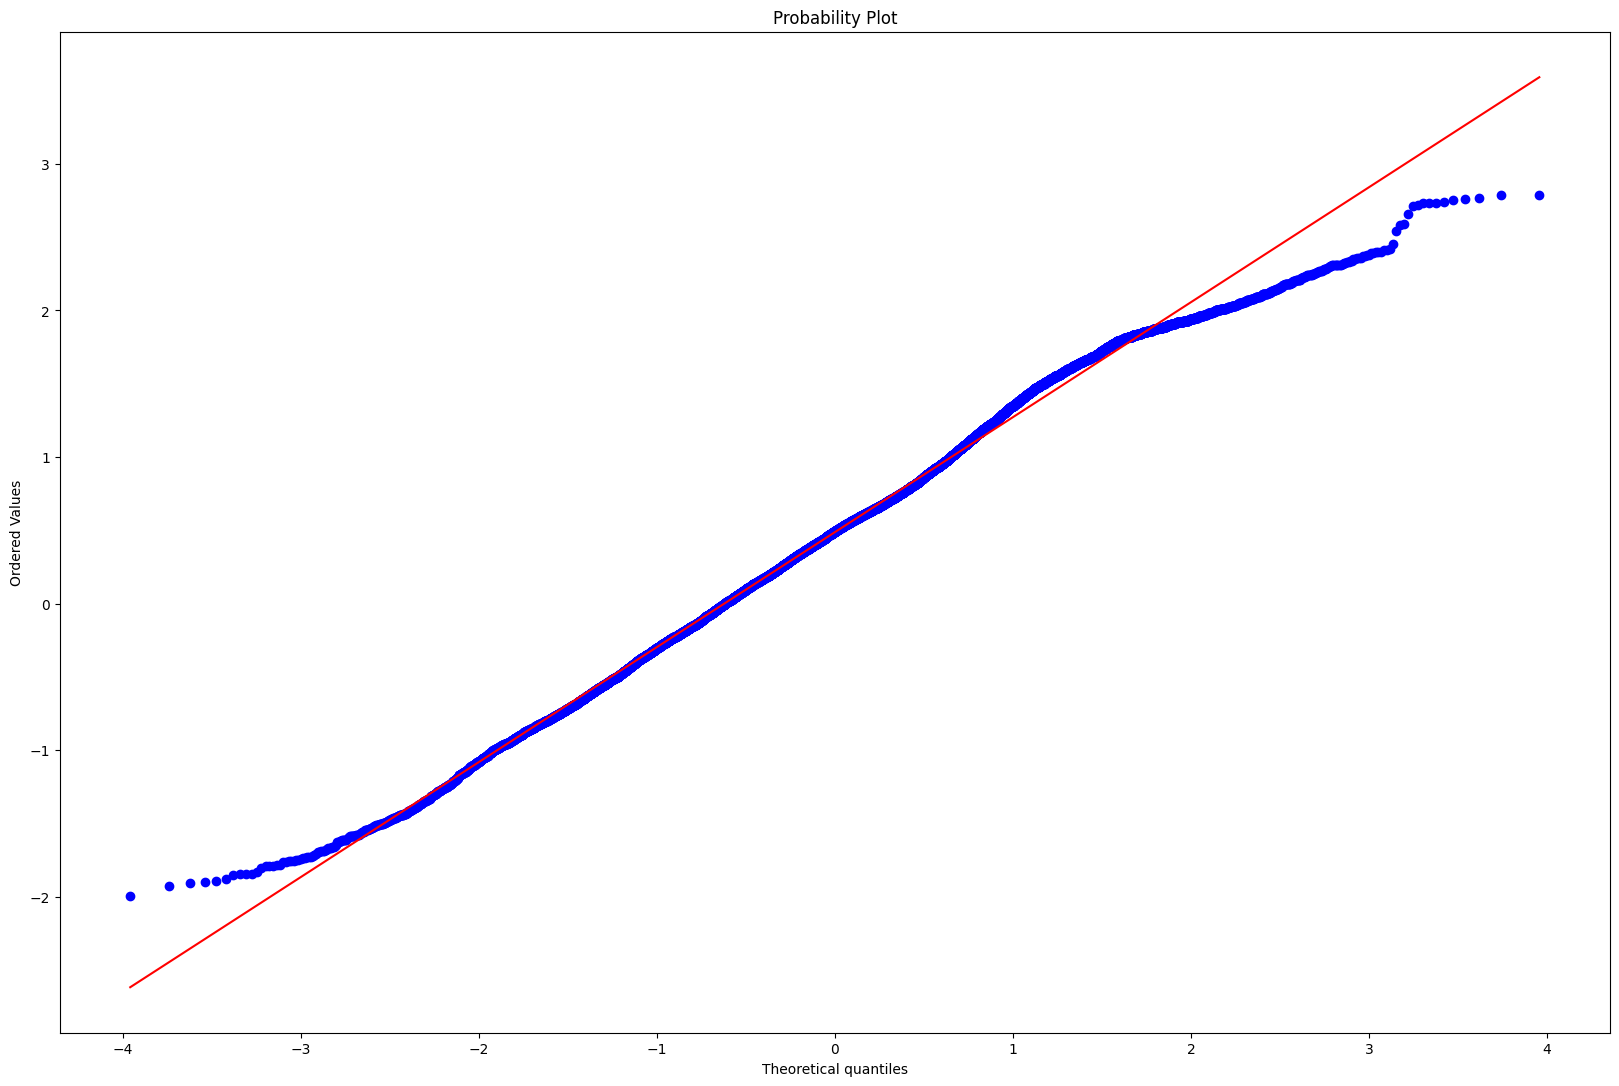

In [83]:
# Q-Q plot
from scipy import stats
import pylab
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

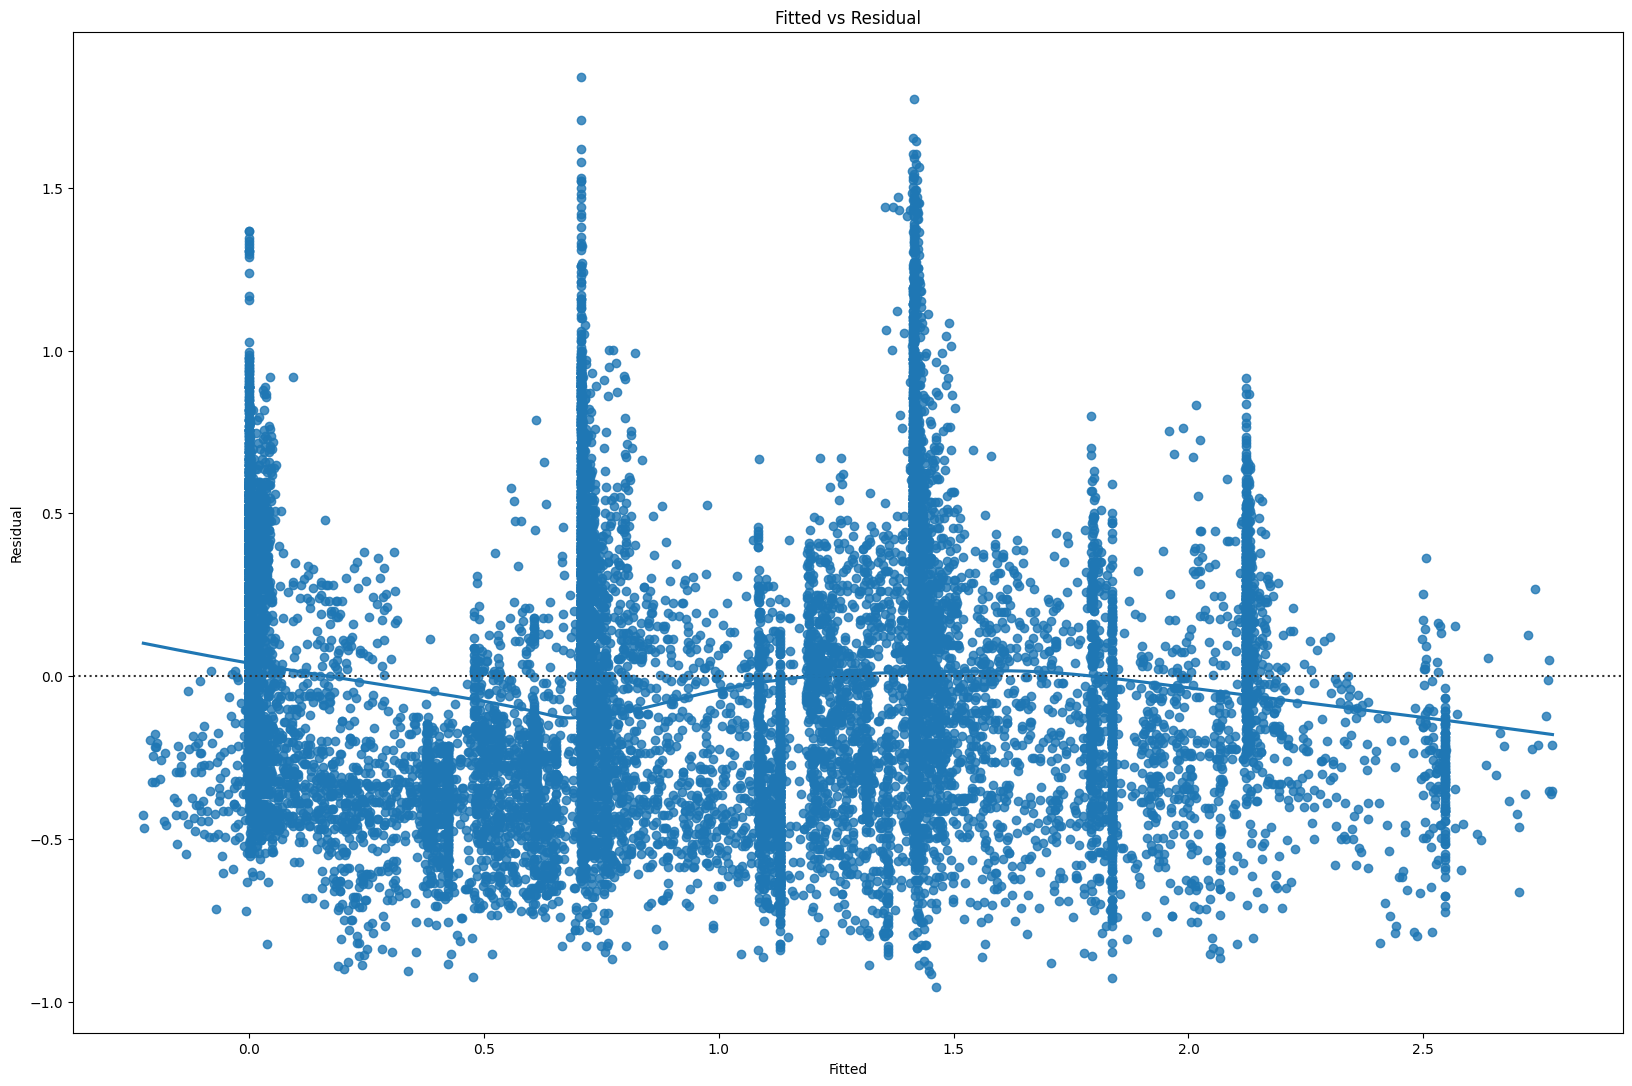

In [84]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = Y1.AveragePrice, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()